In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
# prepare data
data = load_breast_cancer()
x=data.data
y=data.target
print("shape of data:",x.shape)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_new=scaler.fit_transform(x)

shape of data: (569, 30)


In [3]:
# split data into test and training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.10, random_state=2021)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

**1) Logistic Regression**: 
its a classification method. Classification is a supervised learning method from machine learning, that tries to predict to which class a certain entity belongs to, based on its features.

Logistic regression determines the best predicted weights 𝑏₀, 𝑏₁, …, 𝑏ᵣ such that the function 𝑝(𝐱) is as close as possible to all actual responses 𝑦ᵢ, 𝑖 = 1, …, 𝑛, where 𝑛 is the number of observations. The process of calculating the best weights using available observations is called *model training* or *fitting*.

In [4]:
# weights
def weights_bias(shape):
    weights = np.full((shape,1),0.1)
    bias = 1
    return weights,bias

The **sigmoid function** has values very close to either 0 or 1 across most of its domain. Our goal is to find the logistic regression function p(x), such that the predicted responses 𝑝(𝐱ᵢ) are as close as possible to the actual response 𝑦ᵢ (either 0 or 1) for each observation 𝑖 = 1, …, 𝑛. Therefore, it is convenient to use the sigmoid function, so each 𝑝(𝐱ᵢ) is close to either 0 or 1.

In [5]:
# sigmoid function
def sigmoid(z):  
    y_predict = 1/(1+ np.exp(-z))
    return y_predict

In [6]:
# w...weights
# b...bias

def forward_backward(w,b,x_train,y_train):
    '''calculates the gradient of weight and bias
    returns a dictionary with derivatives'''
    z = np.dot(w.T,x_train) + b
    y_predict = sigmoid(z)
    derivative_weight = (np.dot(x_train,((y_predict-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_predict-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return gradients

We use **GD** to find the **optimal weights** and update the parameters.

In [16]:
def update_parameters(w, b, x_train, y_train, learning_rate,iterations):
    for i in range(iterations):
        gradients = forward_backward(w,b,x_train,y_train)
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
    parameters = {"weight": w,"bias": b}
    return parameters, gradients

In [8]:
def predict(w,b,x_test):
    '''Calculates the predicted weights with help of the sigmoid function'''
    z = sigmoid(np.dot(w.T,x_test)+b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [63]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate,  iterations):
    shape =  x_train.shape[0]
    w,b = weights_bias(shape)
    parameters, gradients = update_parameters(w, b, x_train, y_train, learning_rate,iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    loss = np.mean(np.abs(y_prediction_test - y_test)) * 100
    accuracy = 100 - np.mean(np.abs(y_prediction_test - y_test)) * 100
    print("test accuracy: {}% ".format(accuracy))
    return loss

**Loss function**: measures how much the prediction differs from the labels.

In [64]:
loss_values=[]
for i in range(1,150):
    val = [logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.1, iterations = i)]
    loss_values+= val

    i+=1
print(loss_values)

test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 68.42105263157895% 
test accuracy: 70.17543859649123% 
test accuracy: 70.17543859649123% 
test accuracy: 70.17543859649123% 
test accuracy: 70.17543859649123% 
test accuracy: 70.17543859649123% 
test accuracy: 70.17543859649123% 
test accuracy: 70.17543859649123% 
test accuracy: 71.9298245614035% 
test accuracy: 71.929

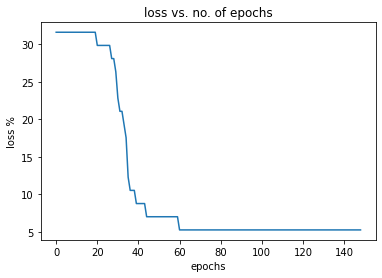

In [69]:
from matplotlib import pyplot as plt
plt.plot(loss_values)
plt.title('loss vs. no. of epochs')
plt.xlabel('epochs')
plt.ylabel('loss %')
plt.show()

**2) **